In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Groceries_dataset.csv")

# Display the first few rows
print(df.head())


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [2]:
# Group items by Member_number (assuming each member's purchases are separate transactions)
transactions = df.groupby(['Member_number'])['itemDescription'].apply(list).tolist()

# Print the first few transactions
for i in range(5):  # Display first 5 transactions
    print(transactions[i])


['soda', 'canned beer', 'sausage', 'sausage', 'whole milk', 'whole milk', 'pickled vegetables', 'misc. beverages', 'semi-finished bread', 'hygiene articles', 'yogurt', 'pastry', 'salty snack']
['frankfurter', 'frankfurter', 'beef', 'sausage', 'whole milk', 'soda', 'curd', 'white bread', 'whole milk', 'soda', 'whipped/sour cream', 'rolls/buns']
['tropical fruit', 'butter milk', 'butter', 'frozen vegetables', 'sugar', 'specialty chocolate', 'whole milk', 'other vegetables']
['sausage', 'root vegetables', 'rolls/buns', 'detergent', 'frozen meals', 'rolls/buns', 'dental care', 'rolls/buns']
['other vegetables', 'pip fruit', 'root vegetables', 'canned beer', 'rolls/buns', 'whole milk', 'other vegetables', 'hygiene articles', 'whole milk', 'whole milk', 'frozen fish', 'red/blush wine', 'chocolate', 'shopping bags', 'dish cleaner', 'packaged fruit/vegetables', 'tropical fruit', 'rolls/buns', 'cling film/bags', 'chocolate', 'pastry']


In [3]:
# Remove duplicate items within each transaction
transactions = [list(set(t)) for t in transactions]

# Display cleaned transactions
for i in range(5):
    print(transactions[i])


['hygiene articles', 'whole milk', 'sausage', 'misc. beverages', 'soda', 'pickled vegetables', 'pastry', 'salty snack', 'semi-finished bread', 'canned beer', 'yogurt']
['whole milk', 'rolls/buns', 'sausage', 'white bread', 'soda', 'curd', 'whipped/sour cream', 'frankfurter', 'beef']
['specialty chocolate', 'whole milk', 'butter', 'other vegetables', 'sugar', 'tropical fruit', 'frozen vegetables', 'butter milk']
['frozen meals', 'rolls/buns', 'detergent', 'sausage', 'root vegetables', 'dental care']
['hygiene articles', 'dish cleaner', 'packaged fruit/vegetables', 'rolls/buns', 'whole milk', 'red/blush wine', 'root vegetables', 'frozen fish', 'pip fruit', 'canned beer', 'shopping bags', 'tropical fruit', 'cling film/bags', 'chocolate', 'pastry', 'other vegetables']


In [4]:
import mlxtend
print(mlxtend.__version__)

0.23.4


In [5]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Convert list of transactions into one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display first few rows of the transformed dataset
df_encoded.head()


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [6]:
from mlxtend.frequent_patterns import apriori

# Find frequent itemsets with minimum support of 0.02 (adjust if needed)
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

# Display frequent itemsets
print(frequent_itemsets)


      support                                           itemsets
0    0.078502                                         (UHT-milk)
1    0.031042                                    (baking powder)
2    0.119548                                             (beef)
3    0.079785                                          (berries)
4    0.062083                                        (beverages)
..        ...                                                ...
889  0.027963       (soda, whole milk, other vegetables, yogurt)
890  0.021293  (other vegetables, whole milk, yogurt, tropica...
891  0.021036            (soda, rolls/buns, whole milk, sausage)
892  0.022832          (sausage, rolls/buns, whole milk, yogurt)
893  0.024628             (soda, rolls/buns, whole milk, yogurt)

[894 rows x 2 columns]


In [7]:
from mlxtend.frequent_patterns import association_rules

# Generate rules with minimum confidence of 0.3 (adjust if needed)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Display the first few rules
print(rules.head())


  antecedents         consequents  antecedent support  consequent support  \
0  (UHT-milk)  (other vegetables)            0.078502            0.376603   
1  (UHT-milk)        (rolls/buns)            0.078502            0.349666   
2  (UHT-milk)              (soda)            0.078502            0.313494   
3  (UHT-milk)        (whole milk)            0.078502            0.458184   
4      (beef)  (other vegetables)            0.119548            0.376603   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.038994    0.496732  1.318979               1.0  0.009430    1.238697   
1  0.031042    0.395425  1.130863               1.0  0.003592    1.075687   
2  0.027450    0.349673  1.115406               1.0  0.002840    1.055632   
3  0.040534    0.516340  1.126928               1.0  0.004565    1.120242   
4  0.050795    0.424893  1.128223               1.0  0.005773    1.083966   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.262440  0.09

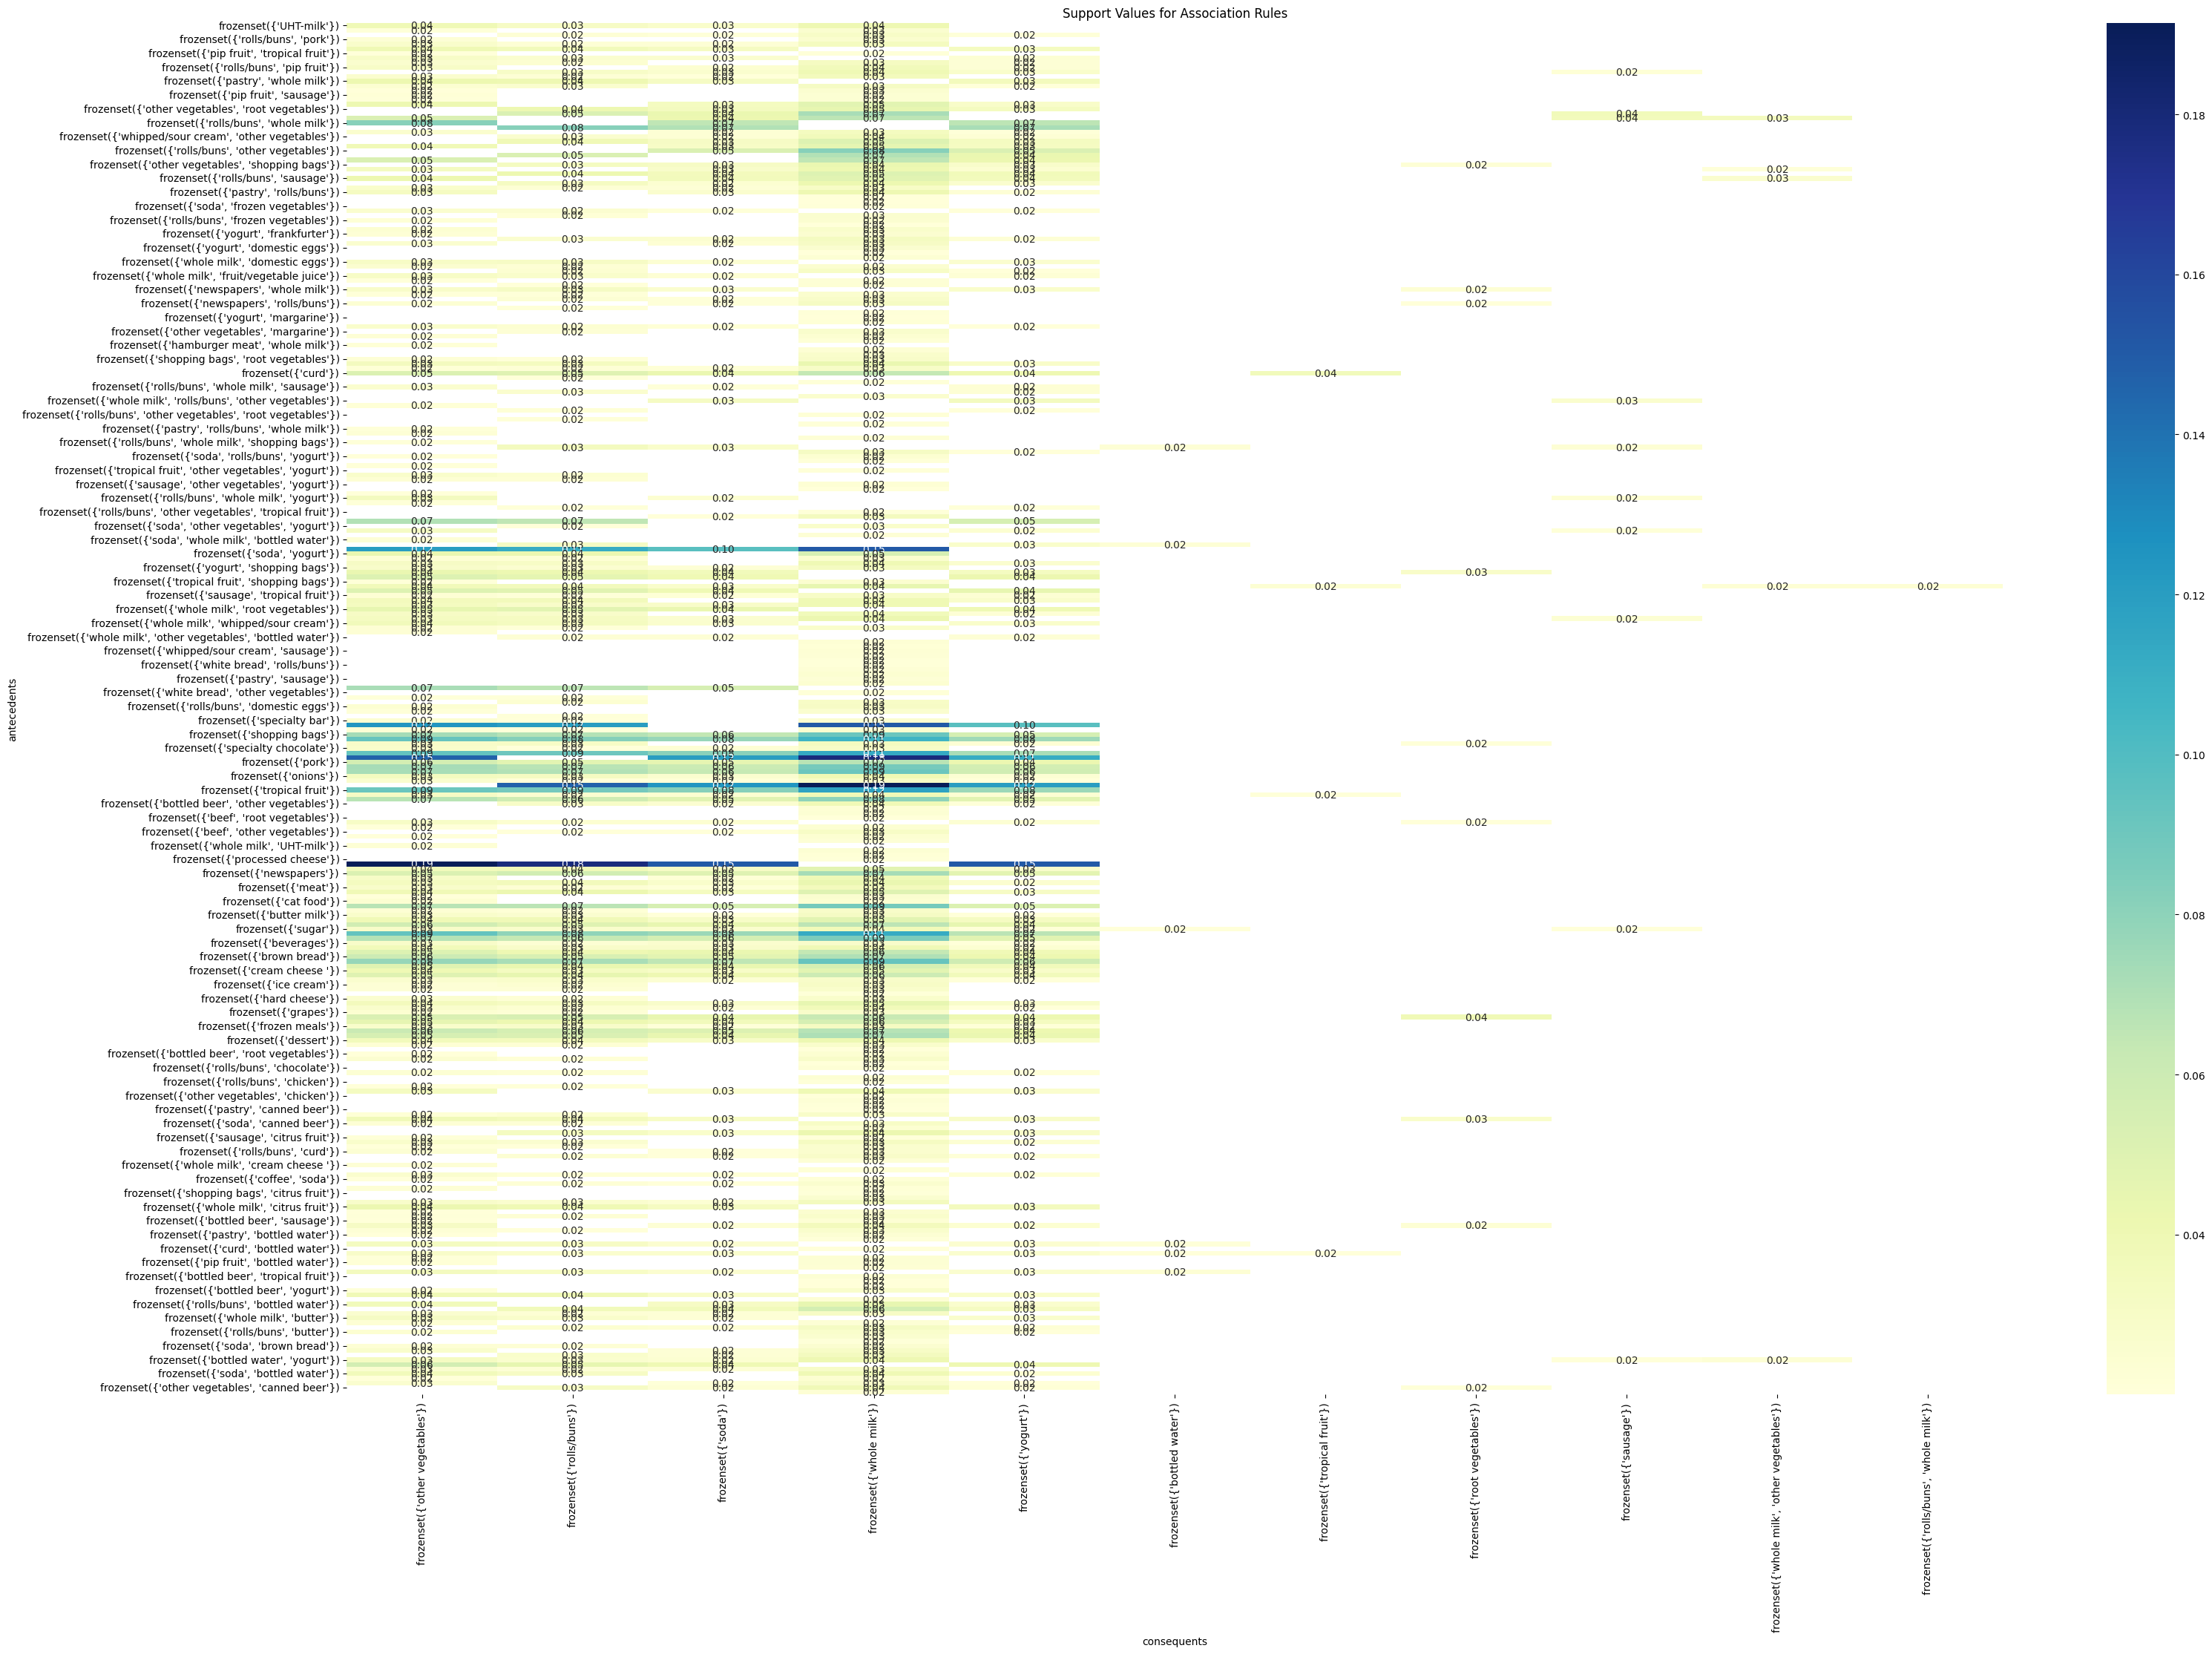

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to create a heatmap
pivot_table = rules.pivot(index="antecedents", columns="consequents", values="support")
plt.figure(figsize=(36, 24))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Support Values for Association Rules")
plt.show()

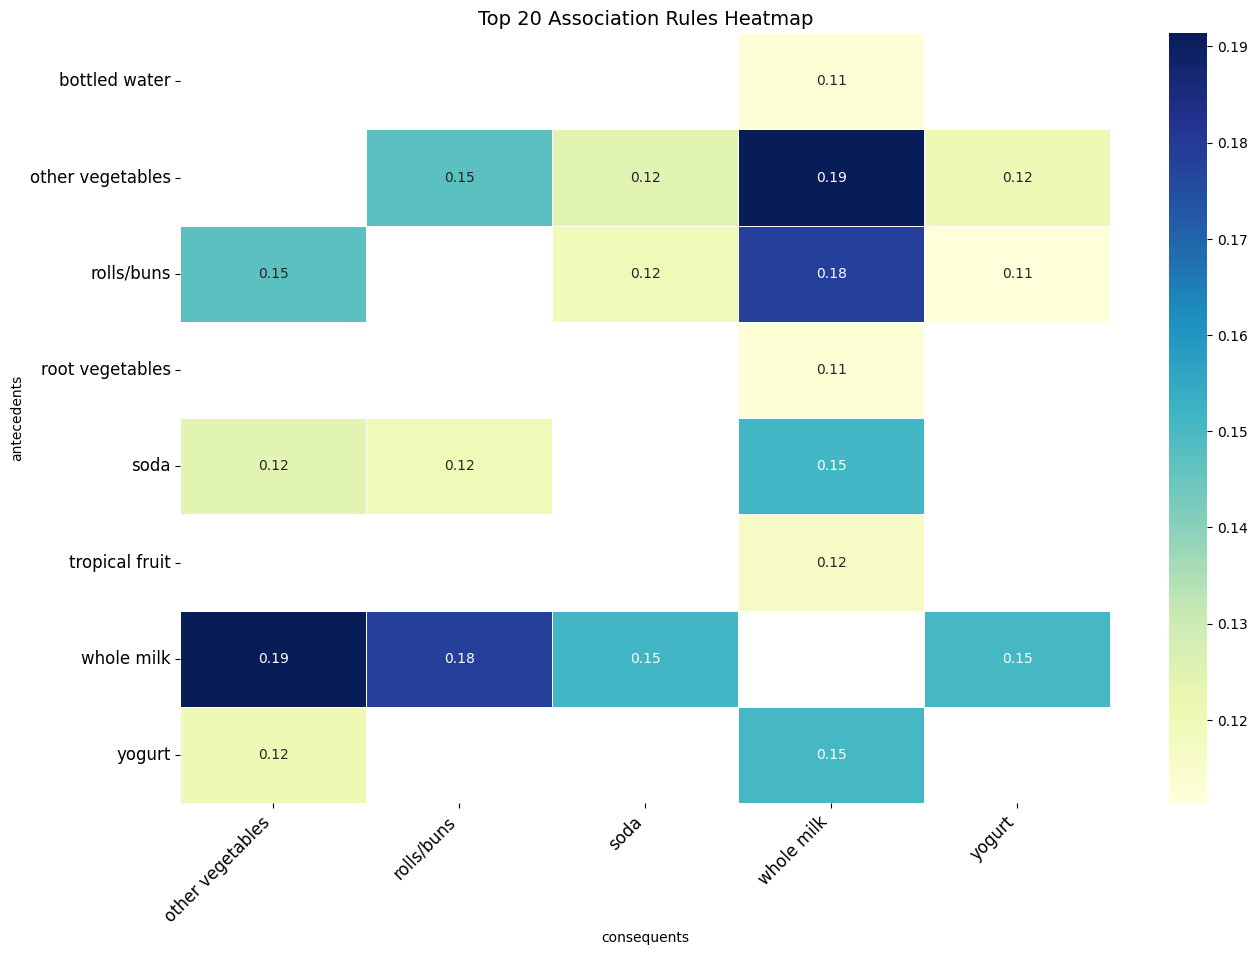

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert frozenset to string for better visualization
rules["antecedents"] = rules["antecedents"].apply(lambda x: ', '.join(list(x)))
rules["consequents"] = rules["consequents"].apply(lambda x: ', '.join(list(x)))

# Select top 20 rules based on support
top_rules = rules.nlargest(20, 'support')

# Pivot for heatmap
pivot_table = top_rules.pivot(index="antecedents", columns="consequents", values="support")

# Increase figure size
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# Improve readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Top 20 Association Rules Heatmap", fontsize=14)
plt.show()


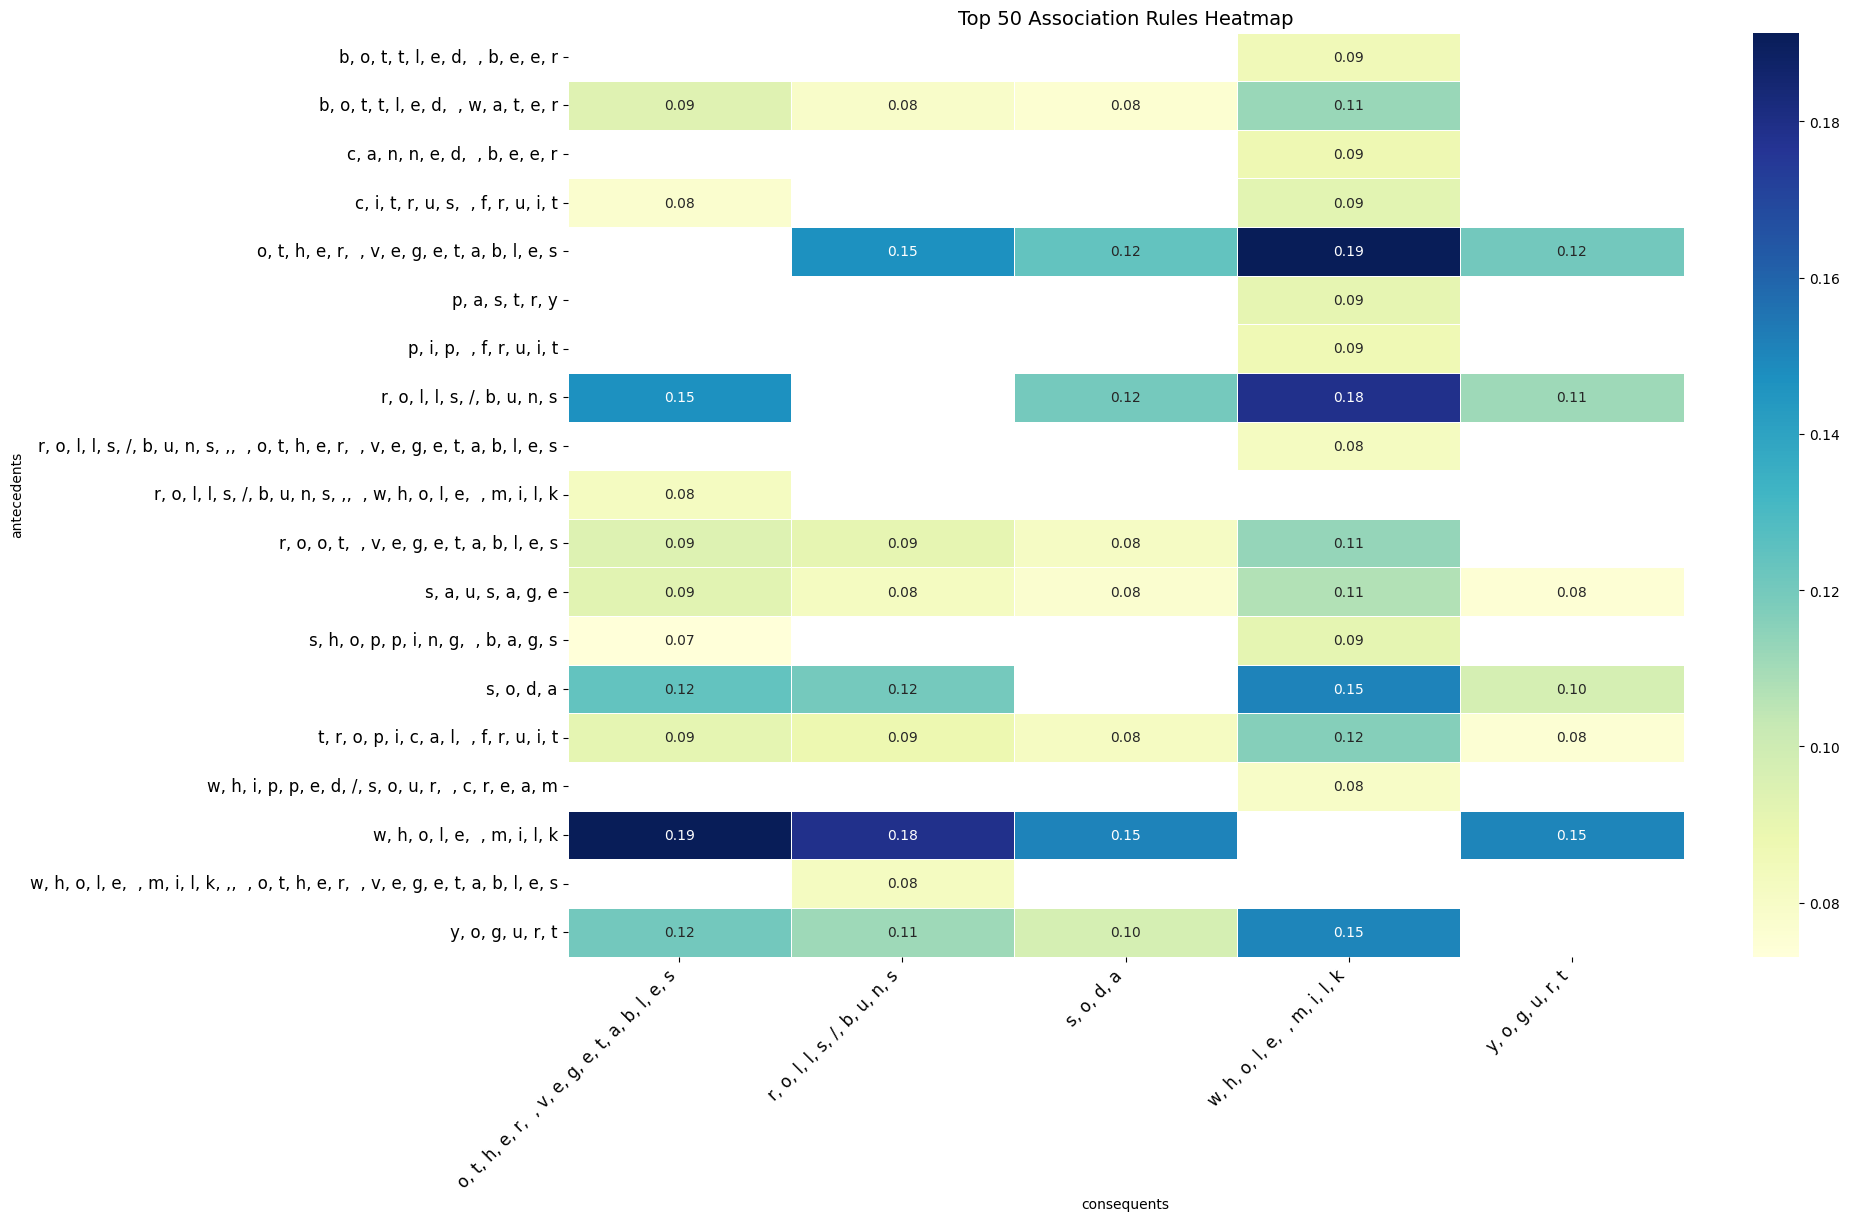

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert frozensets to readable strings
rules["antecedents"] = rules["antecedents"].apply(lambda x: ', '.join(list(x)))
rules["consequents"] = rules["consequents"].apply(lambda x: ', '.join(list(x)))

# Select top 50 rules based on support
top_rules = rules.nlargest(50, 'support')

# Pivot for heatmap
pivot_table = top_rules.pivot(index="antecedents", columns="consequents", values="support")

# Increase figure size for better readability
plt.figure(figsize=(18, 12))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# Improve label readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Top 50 Association Rules Heatmap", fontsize=14)
plt.show()


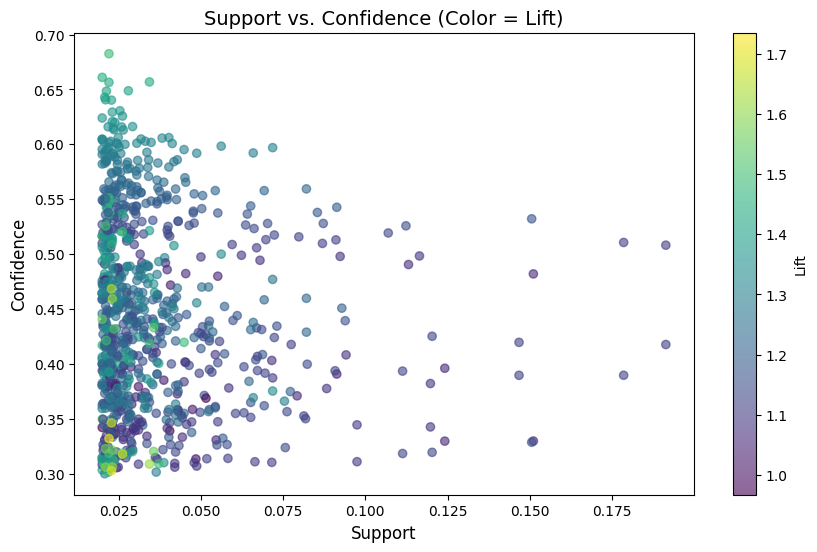

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot of support vs. confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.6, c=rules['lift'], cmap='viridis')

# Add colorbar for lift values
plt.colorbar(label="Lift")

# Labels and title
plt.xlabel("Support", fontsize=12)
plt.ylabel("Confidence", fontsize=12)
plt.title("Support vs. Confidence (Color = Lift)", fontsize=14)

# Show plot
plt.show()


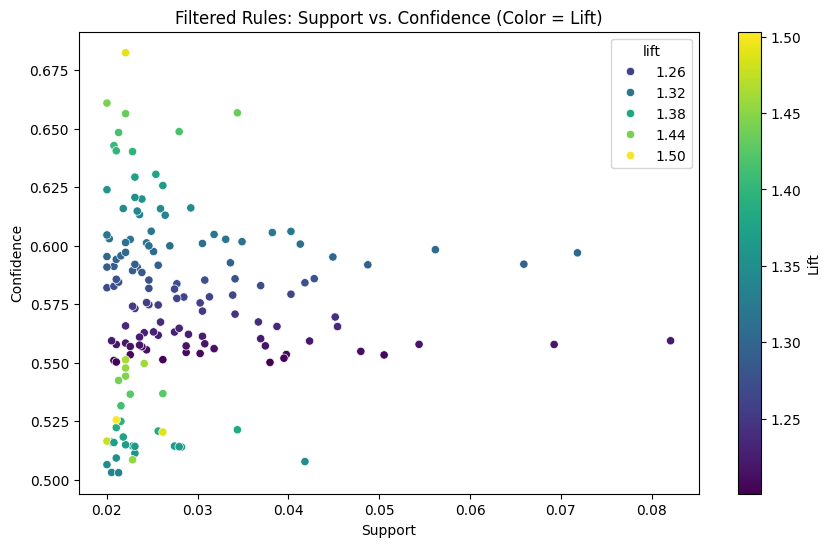

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors

# Ensure strong_rules is not empty
strong_rules = rules[(rules['lift'] > 1.2) & (rules['confidence'] > 0.5)]
if strong_rules.empty:
    print("No rules found with lift > 1.2 and confidence > 0.5. Adjusting thresholds...")
    strong_rules = rules[(rules['lift'] > 1.1) & (rules['confidence'] > 0.45)]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Normalize lift values
norm = colors.Normalize(vmin=strong_rules['lift'].min(), vmax=strong_rules['lift'].max())
sm = cm.ScalarMappable(norm=norm, cmap='viridis')

# Scatter plot
scatter = sns.scatterplot(
    ax=ax,
    data=strong_rules, 
    x='support', 
    y='confidence', 
    hue='lift', 
    palette='viridis'
)

plt.title("Filtered Rules: Support vs. Confidence (Color = Lift)")
plt.xlabel("Support")
plt.ylabel("Confidence")

# Add colorbar using fig.colorbar()
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Lift")

plt.show()


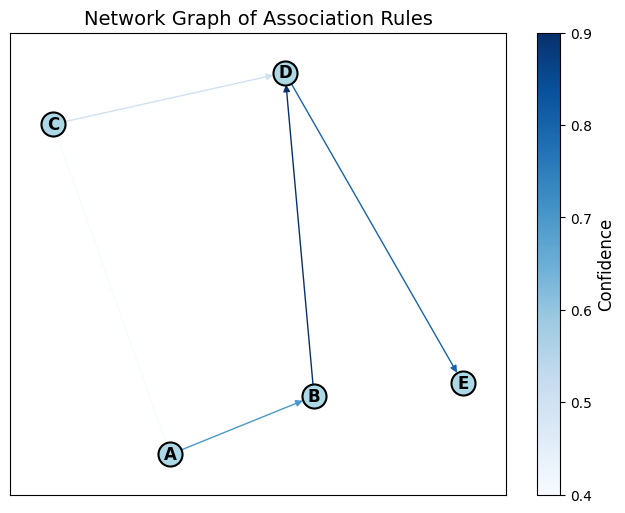

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Create a directed graph
G = nx.DiGraph()

# Example edges with confidence values
edges = [
    ('A', 'B', 0.7),
    ('A', 'C', 0.4),
    ('B', 'D', 0.9),
    ('C', 'D', 0.5),
    ('D', 'E', 0.8)
]

# Add edges to the graph with weights
for u, v, confidence in edges:
    G.add_edge(u, v, weight=confidence)

# Extract confidence values
confidence_values = [d['weight'] for _, _, d in G.edges(data=True)]

# Create a colormap and normalize it
cmap = cm.Blues
norm = mcolors.Normalize(vmin=min(confidence_values), vmax=max(confidence_values))

# Draw the network graph
fig, ax = plt.subplots(figsize=(8, 6))  # Ensure ax is created for colorbar reference
pos = nx.spring_layout(G, seed=42)  # Node positions

# Draw edges with color based on confidence
edges = nx.draw_networkx_edges(G, pos, edge_color=confidence_values, edge_cmap=cmap, edge_vmin=min(confidence_values), edge_vmax=max(confidence_values), ax=ax)

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_color='lightblue', edgecolors='black', linewidths=1.5, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', ax=ax)

# Add colorbar linked to edges
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for the colorbar to work
cbar = plt.colorbar(sm, ax=ax)  # Attach colorbar to the existing axis
cbar.set_label("Confidence", fontsize=12)

plt.title("Network Graph of Association Rules", fontsize=14)
plt.show()


In [25]:
import pandas as pd

# Convert list to DataFrame (assuming it's a list of dictionaries)
rules_df = pd.DataFrame(rules)

# Check if conversion was successful
print(rules_df.head())  # Print first few rows to verify the structure


  antecedents consequents  confidence
0         {A}         {B}         0.5
1         {A}         {C}         0.4
2         {B}         {D}         0.9
3         {C}         {D}         0.6
4         {D}         {E}         0.7


In [26]:
print(type(rules))  # Check if it's a list
print(rules[:5])  # Print the first 5 elements


<class 'list'>
[{'antecedents': {'A'}, 'consequents': {'B'}, 'confidence': 0.5}, {'antecedents': {'A'}, 'consequents': {'C'}, 'confidence': 0.4}, {'antecedents': {'B'}, 'consequents': {'D'}, 'confidence': 0.9}, {'antecedents': {'C'}, 'consequents': {'D'}, 'confidence': 0.6}, {'antecedents': {'D'}, 'consequents': {'E'}, 'confidence': 0.7}]
